In [8]:
#install python-docx
# !pip install python-docx

In [16]:
import pandas as pd
import numpy as np
from docx import Document
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [17]:
#Q1
#Use Document method of python-docx to open and read the file
document = Document("Set+1_Descriptive+statistics+Probability+(2).docx")

In [19]:
#Since our focus is to extract the data from tables in docx, we would use document.tables[<table_num>] 
# to read a specific table present in the file by passing the table number
table1, table2 = document.tables[:]

,Name of company,Measure X
1,Allied Signal,24.23%
2,Bankers Trust,25.53%
3,General Mills,25.41%
4,ITT Industries,24.14%
5,J.P.Morgan & Co.,29.62%
6,Lehman Brothers,28.25%
7,Marriott,25.81%
8,MCI,24.39%
9,Merrill Lynch,40.26%
10,Microsoft,32.95%


In [34]:
#Data Preparation
data1 = [[cell.text for cell in row.cells] for row in table1.rows]
data2 = [[cell.text for cell in row.cells] for row in table2.rows]
df1 = pd.DataFrame(data1,columns = data1[0]).drop(0)
df2 = pd.DataFrame(data2, columns = data2[0]).drop(0)
df1["Measure X"] = [float(value.replace("%","")) for value in df1["Measure X"]]
df2.x = [int(value.replace(",","")) for value in df2.x]
df2["P(x)"] = [float(value) for value in df2["P(x)"]]

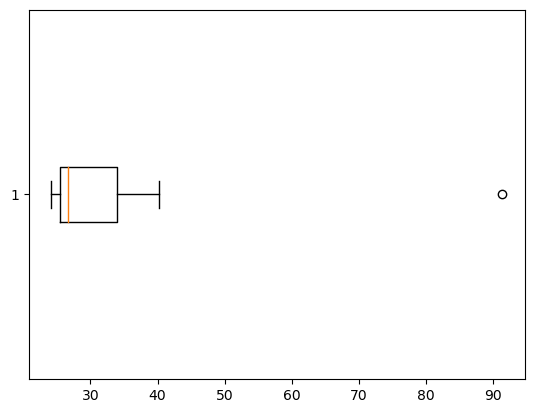

In [39]:
#For outliers
box1 = plt.boxplot(df1["Measure X"],vert=False) 
[data.get_ydata() for data in box1["fliers"]]
plt.savefig("Set1Q2.png")

In [125]:
#for mean,std,var
np.round(df1["Measure X"].agg(["mean","std","var"]),3)

mean     33.271
std      16.945
var     287.147
Name: Measure X, dtype: float64

In [130]:
df1.to_csv("table1.csv")

<BarContainer object of 15 artists>

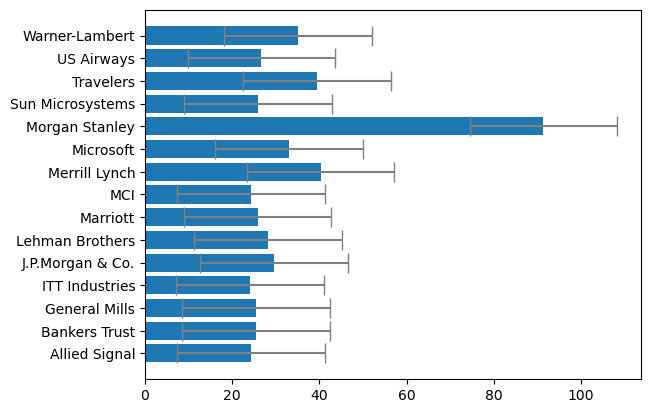

In [142]:
#plot the data
plt.barh(df1[df1.columns[0]],df1[df1.columns[1]],xerr = df["Measure X"].std(),error_kw = {"ecolor" : "0.5","capsize": 7})

In [146]:
#Q5
df2["E(x)"] = df2.x * df2["P(x)"]
df2["E(x)"].sum()

800.0

In [163]:
#Convert dataframe to docx
doc = Document()
t = doc.add_table(rows = (df2.shape[0] + 1),cols = df2.shape[1])

In [165]:
for j in range(df2.shape[1]):
    t.cell(0, j).text = df2.columns[j]
# Add the body of the data frame
for i in range(df.shape[0]):
    for j in range(df2.shape[1]):
        cell = df2.iat[i, j]
        t.cell(i + 1, j).text = str(cell)

IndexError: index 6 is out of bounds for axis 0 with size 6

In [168]:
#Save as doc
doc.save("table2.docx")

In [169]:
#SET2

In [226]:
#Q1
mean = 45
std = 8
data3 = pd.Series(np.round(np.random.normal(loc=mean,scale=std,size=1000),0))
data3 = data3.value_counts()

In [202]:
df3 = pd.DataFrame({"values" : data3.index, "counts" : data3.values})

<Axes: ylabel='Density'>

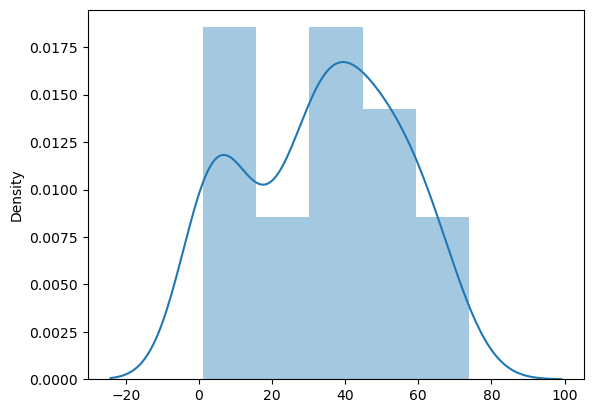

In [205]:
sns.distplot(df3)

In [208]:
df3.to_csv("Set2_Q1.csv",index=False,header=True)

In [213]:
ser = pd.Series(np.round(np.random.normal(loc=mean,scale=std,size=10000),0))

In [214]:
df4 = pd.DataFrame()
df4["values"] = ser.values

In [218]:
df4.to_csv("Set2_Q1.1.csv",index=False,header=True)

<Axes: ylabel='Density'>

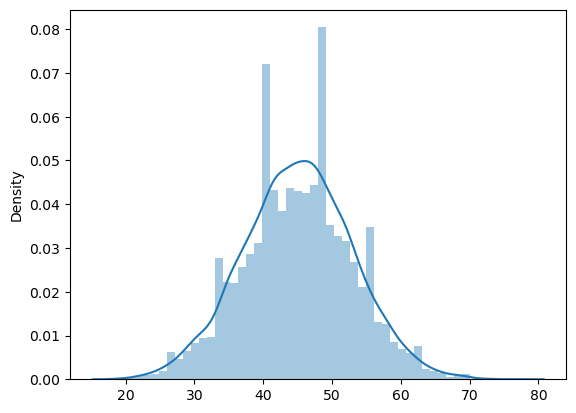

In [219]:
sns.distplot(df4)

In [223]:
1 - stats.norm.cdf(50,loc=mean,scale = std)

0.26598552904870054

In [225]:
#Q2
mean2 = 38
std2 = 6

In [227]:
stats.norm.cdf(44,loc=mean2,scale=std2) - stats.norm.cdf(38,loc=mean2,scale=std2)

0.3413447460685429

In [228]:
1 - stats.norm.cdf(44,loc=mean2,scale=std2)

0.15865525393145707

In [229]:
ser2 = pd.Series(np.round(np.random.normal(mean2,std2,size=400)))

<Axes: ylabel='Density'>

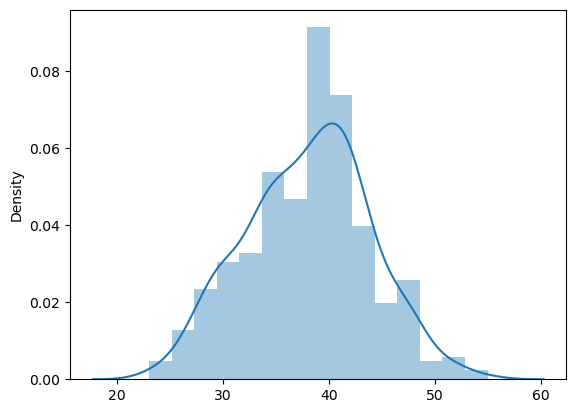

In [230]:
sns.distplot(ser2)

In [232]:
# No. of employees attending training program from 400 nos. is N*P(X<30)
400 * stats.norm.cdf(30,loc=mean2,scale=std2)

36.484487890347154

In [233]:
#Q4
#4.Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 
stats.norm.interval(0.99,loc=100,scale=20)

(48.48341392902199, 151.516586070978)

In [234]:
stats.norm.cdf(-0.005,loc=100,scale=20)

2.8628012420754157e-07

In [240]:
#Q5
total_mean = (5 + 7) * 45       #using conversion rate
total_std = np.sqrt(9 + 16) * 45
print(total_mean,total_std)

540 225.0


In [242]:
#A.Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
stats.norm.interval(0.95,loc=total_mean,scale=total_std)

(99.00810347848784, 980.9918965215122)

In [243]:
#Specify the 5th percentile of profit (in Rupees) for the company
# To compute 5th Percentile, we use the formula X=μ + Zσ; wherein from z table,
X= 540+(-1.645)*(225)
print('5th percentile of profit (in Million Rupees) is',np.round(X,))

5th percentile of profit (in Million Rupees) is 170.0


In [244]:
# Probability of Division 1 making a loss P(X<0)
stats.norm.cdf(0,5,3)

0.0477903522728147

In [245]:
# Probability of Division 2 making a loss P(X<0)
stats.norm.cdf(0,7,4)

0.040059156863817086

In [254]:
data4 = pd.Series(np.round(np.random.binomial(10,0.2,10000),0))

In [256]:
data4.to_csv("data4.csv")

In [255]:
A2 Poajors cl tdo kagazfeo ;6888@2aZdfs fs puro assukptfce. Zdoro fs a ?8% ndaeno tdat tdo sakpio koae(
 º
 T 
) fsgroator tdae tdo pcpuiatfce koae(¿). Patfeg cl tdo nakora(7.?)N2 ^akpifeg lrako2 Aii roajors cl tdo fssuo wdoro tdo survoy was feniujoj.J2 00?O2 \ciuetary rospcesoL2 Ft fs pcssf`io tdat ceiy tdcso wdc woro partfnuiariy pioasoj cr ceiy wdc arojfspioasoj wftd tdo prcjunt partfnfpatoj fe tdo survoy wdfnd nae kamos tdo rosuitsueroifa`io.

0       4
1       1
2       3
3       5
4       2
       ..
9995    2
9996    1
9997    0
9998    1
9999    1
Length: 10000, dtype: int32